In [224]:
import cv2
import matplotlib.pyplot as plt
#import mediapipe as mp
import mediapipe.framework.formats.landmark_pb2 as landmark_pb2
import os
from tensorflow.keras import backend as K

In [225]:
def load_landmark_list(filename):
    # Read the serialized data from the file
    with open(filename, "rb") as file:
        serialized_data = file.read()

    # Deserialize the data into a NormalizedLandmarkList object
    normalized_landmark_list = landmark_pb2.NormalizedLandmarkList()
    normalized_landmark_list.ParseFromString(serialized_data)

    return normalized_landmark_list

In [226]:
landmarks_folder = f"training/landmarks/"

In [228]:
os.listdir(landmarks_folder)

['.DS_Store', 'squat', 'crane', 'stand', 'X']

In [227]:
landmark_list = load_landmark_list(os.path.join(landmarks_folder, "stand", "stand_1692099300.pb"))
landmark_list = landmark_list.landmark
landmark_list

[x: 0.4750522
y: 0.20307502
z: -0.3134667
visibility: 0.99975574
, x: 0.48073882
y: 0.18814713
z: -0.29747063
visibility: 0.9995756
, x: 0.4842968
y: 0.188562
z: -0.29753354
visibility: 0.9995761
, x: 0.48740354
y: 0.18917695
z: -0.2975257
visibility: 0.9995832
, x: 0.4700288
y: 0.1880081
z: -0.2967674
visibility: 0.9995652
, x: 0.46660572
y: 0.18827184
z: -0.2967671
visibility: 0.99956703
, x: 0.46332374
y: 0.18882029
z: -0.2967433
visibility: 0.9995872
, x: 0.491326
y: 0.19829635
z: -0.18603565
visibility: 0.99929374
, x: 0.45912933
y: 0.1963901
z: -0.18207397
visibility: 0.9993828
, x: 0.4817802
y: 0.21931557
z: -0.27045193
visibility: 0.99966204
, x: 0.46880126
y: 0.21785492
z: -0.2694581
visibility: 0.9996765
, x: 0.5206879
y: 0.30290607
z: -0.10716871
visibility: 0.9998007
, x: 0.42678007
y: 0.30332285
z: -0.098852225
visibility: 0.99972034
, x: 0.5328618
y: 0.42464387
z: -0.07619977
visibility: 0.97970325
, x: 0.41304278
y: 0.43208635
z: -0.06335667
visibility: 0.9757525
, x: 0.

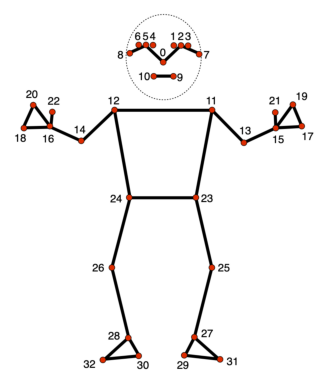

In [5]:
landmarks_pic = cv2.imread('./documentation/pose_landmarks_index.png')
landmarks_pic = cv2.cvtColor(landmarks_pic, cv2.COLOR_BGR2RGB)

plt.imshow(landmarks_pic)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

Omit following landmarks (face, fingers, feet):

~~0 - nose~~<br>
~~1 - left eye~~<br>
~~2 - left eye~~<br>
~~3 - left eye~~<br>
~~4 - right eye~~<br>
~~5 - right eye~~<br>
~~6 - right eye~~<br>
~~7 - left ear~~<br>
~~8 - right ear~~<br>
~~9 - mouth (left)~~<br>
~~10 - mouth (right)~~<br>
11 - left shoulder<br>
12 - right shoulder<br>
13 - left elbow<br>
14 - right elbow<br>
15 - left wrist<br>
16 - right wrist<br>
~~17 - left pinky~~<br>
~~18 - right pinky~~<br>
~~19 - left index~~<br>
~~20 - right index~~<br>
~~21 - left thumb~~<br>
~~22 - right thumb~~<br>
23 - left hip<br>
24 - right hip<br>
25 - left knee<br>
26 - right knee<br>
27 - left ankle<br>
28 - right ankle<br>
~~29 - left heel~~<br>
~~30 - right heel~~<br>
~~31 - left foot index~~<br>
~~32 - right foot index~~<br>

In [ ]:
landmark_list[0]

In [6]:
test_list = [i for i in range(33)]

In [ ]:
test_list[11:17]+test_list[23:29]

In [ ]:
filtered_landmark_list = landmark_list[11:17]+landmark_list[23:29]
len(filtered_landmark_list)
# -> 12 landmarks left!

In [ ]:
filtered_landmark_list[0].x

In [ ]:
coordinate_array = []

for landmark in filtered_landmark_list:
    x = landmark.x
    y = landmark.y
    #z = landmark.z
    coordinate_array.append([x, y])

In [ ]:
coordinate_array

In [ ]:
coordinate_array = np.array(coordinate_array)

In [ ]:
coordinate_array

In [ ]:
perturbed_coordinates

#### THIS ####

In [7]:
# label dict (encoded)

label_list = [label for label in os.listdir(landmarks_folder) if label != '.DS_Store']

label_mapping = {}

for code, label in enumerate(sorted(label_list)):
        label_mapping[label] = code
        
label_mapping

{'X': 0, 'crane': 1, 'squat': 2, 'stand': 3}

In [70]:
def perturbate_coordinates(coordinates, translation_range=0.1, noise_std=0.05): 
    perturbed_coordinates = []
    for coord in coordinates:
        # Translate the coordinates
        translation = np.random.uniform(-translation_range, translation_range, size=2)
        translated_coord = coord + translation
        
        # Add noise to the translated coordinates
        noise = np.random.normal(0, noise_std, size=2)
        perturbed_coord = translated_coord + noise
        
        perturbed_coordinates.append(perturbed_coord)
    
    return np.array(perturbed_coordinates)

In [71]:
import os
import numpy as np


# Initialize lists to store data
X_p = []
y_p = []

# Iterate through each subfolder (pose label)
for pose_folder in os.listdir(landmarks_folder):
    if not pose_folder.startswith('.'):  # Exclude hidden files/folders
        pose_label = label_mapping.get(pose_folder)  # Use your label mapping
        if pose_label is not None:
            pose_label = int(pose_label)

            # Process the landmark data for the current pose
            pose_folder_path = os.path.join(landmarks_folder, pose_folder)
            for entry_filename in os.listdir(pose_folder_path):
                if entry_filename.endswith('.pb'):  
                    landmark_list = load_landmark_list(os.path.join(pose_folder_path, entry_filename))
                    filtered_landmark_list = landmark_list.landmark[11:17] + landmark_list.landmark[23:29]

                    # Original landmarks for this pose
                    original_landmarks_pose = []
                    for landmark in filtered_landmark_list:
                        x = landmark.x
                        y_ = landmark.y
                        original_landmarks_pose.append([x, y_])

                    # Perturbate and store perturbed landmarks for this pose
                    for _ in range(20):  # Expand 10-fold
                        perturbed_landmarks = perturbate_coordinates(original_landmarks_pose)
                        X_p.append(perturbed_landmarks)
                        y_p.append(pose_label)

# Convert lists to numpy arrays
X_p = np.array(X_p)
y_p= np.array(y_p)

# Shuffle the data
shuffle_indices = np.arange(len(X_p))
np.random.shuffle(shuffle_indices)
X_p = X_p[shuffle_indices]
y_p = y_p[shuffle_indices]


In [72]:
# Reshape the X array to 2D
num_samples, num_landmarks, num_dimensions = X_p.shape

num_samples, num_landmarks, num_dimensions 

(3160, 12, 2)

In [73]:
# Reshape the X array to 2D
num_samples, num_landmarks, num_dimensions = X_p.shape
X_reshaped = X_p.reshape(num_samples, num_landmarks * num_dimensions)

In [74]:

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on your reshaped data and transform X
X_standardized = scaler.fit_transform(X_reshaped)

In [ ]:
X_reshaped.shape, y_p.shape

In [ ]:
y_p.shape

In [ ]:
X_reshaped.shape

In [ ]:
X_p.shape

In [75]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_reshaped, y_p, test_size=0.2, random_state=42)

In [61]:
X_train.shape, y_train.shape

((2528, 24), (2528,))

In [48]:
X_train.shape[1]

24

In [76]:
from keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=4)
y_val_encoded = to_categorical(y_val, num_classes=4)

In [221]:
print(y_val_encoded )

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
y_train_encoded.shape

In [ ]:
X_reshaped.shape

In [ ]:
X_train.shape[1]

In [77]:
K.clear_session()

In [205]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


# Create a sequential model
model_g = keras.Sequential()

# Add layers to the model
model_g.add(keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model_g.add(keras.layers.Dense(units=32, activation='relu'))
model_g.add(keras.layers.Dense(units=4, activation='softmax'))  # Output layer with 4 units for 4 classes

# Compile the model
model_g.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_g.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1600      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3812 (14.89 KB)
Trainable params: 3812 (14.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [206]:
# Define a custom callback to stop training if validation loss stops decreasing
class EarlyStoppingLoss(tf.keras.callbacks.Callback):
    def __init__(self, patience=5, min_delta=1e-4):
        super(EarlyStoppingLoss, self).__init__()
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('val_loss')
        if current_loss is None:
            return

        if current_loss + self.min_delta < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True

# Create an instance of the custom callback
early_stopping = EarlyStoppingLoss(patience=10, min_delta=0.1)

In [207]:
# Train the model
batch_size = 32
epochs = 100
history = model_g.fit(X_train, y_train_encoded , batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val_encoded), callbacks=[early_stopping])

Epoch 1/100
79/79 [==============================] - 2s 6ms/step - loss: 1.2138 - accuracy: 0.5455 - val_loss: 0.9711 - val_accuracy: 0.7421
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.7765 - val_loss: 0.6277 - val_accuracy: 0.8307
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5720 - accuracy: 0.8097 - val_loss: 0.4860 - val_accuracy: 0.8275
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4882 - accuracy: 0.8165 - val_loss: 0.4454 - val_accuracy: 0.8370
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8256 - val_loss: 0.4276 - val_accuracy: 0.8386
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8291 - val_loss: 0.4130 - val_accuracy: 0.8307
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8343 - val_loss: 0.4092 - val_accuracy: 0.8339
Epoch 8/100
7

In [222]:
X_train.shape

(2528, 24)

In [208]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [209]:
# Create a DataFrame to store the metrics data
import pandas as pd

epochs = range(1, len(train_accuracy) + 1)
df_metrics = pd.DataFrame({'Epoch': epochs,
                           'Training Accuracy': train_accuracy,
                           'Validation Accuracy': val_accuracy,
                           'Training Loss': train_loss,
                           'Validation Loss': val_loss})

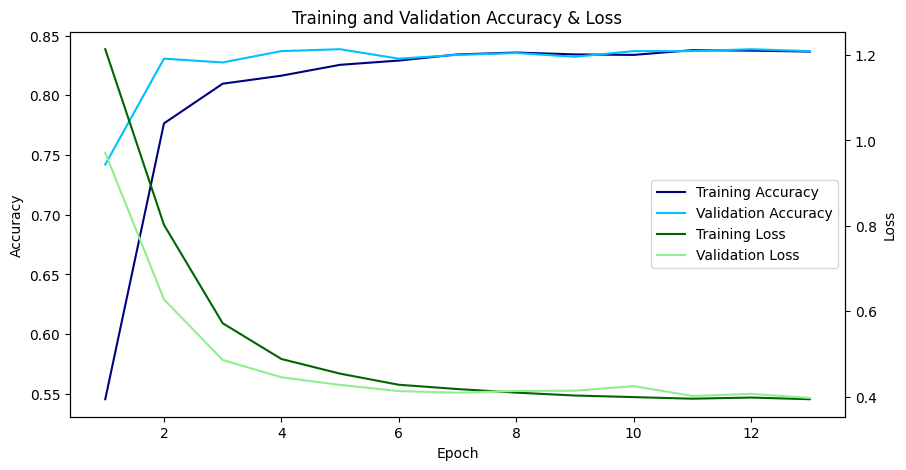

In [223]:
import seaborn as sns

# Plot the training and validation accuracy with light and dark blue
plt.figure(figsize=(10, 5))

# First y-axis for Accuracy 
ax1 = sns.lineplot(x='Epoch', y='Training Accuracy', data=df_metrics, color='navy', label='Training Accuracy')
ax1 = sns.lineplot(x='Epoch', y='Validation Accuracy', data=df_metrics, color='deepskyblue', label='Validation Accuracy')

# Second y-axis for Loss
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Epoch', y='Training Loss', data=df_metrics, color='darkgreen', label='Training Loss', legend=False)
ax2 = sns.lineplot(x='Epoch', y='Validation Loss', data=df_metrics, color='lightgreen', label='Validation Loss', legend=False)

# Set labels for y-axes
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

# Set legends for the lines plotted on each axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='center right')

plt.grid(False)

plt.title('Training and Validation Accuracy & Loss')
plt.xlabel('Epoch')

plt.savefig('./figures/accuracy_loss_plot_model_xxx.png')
plt.show()

In [85]:
model_p.save('./models/model_3.h5')

/Users/alexanderschenk/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### TEST

In [190]:
landmarks_test = "test/landmarks/"

In [89]:
pics_test = "pictures/landmarks/"

In [191]:
test_landmarks= [f for f in landmarks_test if os.path.isfile(os.path.join(landmarks_test, f))]

In [192]:
landmarks_test.startswith('.')

False

In [193]:
os.listdir(landmarks_test)

['X_1692183580.pb',
 'stand_1692183586.pb',
 '.DS_Store',
 'stand_1692183574.pb',
 'squat_1692183577.pb',
 'crane_1692183583.pb']

In [195]:
TEST_array = []

for filename in os.listdir(landmarks_test):
    if filename.endswith('.pb'):
        landmark_list = load_landmark_list(os.path.join(landmarks_test, filename))
        filtered_landmark_list = landmark_list.landmark[11:17] + landmark_list.landmark[23:29]
        
        landmarks_coordinates = []
        for landmark in filtered_landmark_list:
            x = landmark.x
            y_ = landmark.y
            landmarks_coordinates.append([x, y_])
            
        TEST_array.append(landmarks_coordinates)
        
TEST_array = np.array(TEST_array)
        
num_samples, num_landmarks, num_dimensions = TEST_array.shape
TEST_reshaped = TEST_array.reshape(num_samples, num_landmarks * num_dimensions)
TEST_reshaped.shape


(5, 24)

In [196]:
TEST_array = np.array(TEST_array)

In [197]:
TEST_array.shape

(5, 12, 2)

In [198]:
# Reshape the TEST array to 2D
num_samples, num_landmarks, num_dimensions = TEST_array.shape
TEST_reshaped = TEST_array.reshape(num_samples, num_landmarks * num_dimensions)
TEST_reshaped.shape

(5, 24)

In [199]:
TEST_reshaped[0]

array([0.50311315, 0.19028379, 0.392088  , 0.19464046, 0.57049507,
       0.15507589, 0.31552655, 0.15709358, 0.63432068, 0.05378385,
       0.25183195, 0.06187867, 0.47859254, 0.50174135, 0.41782302,
       0.50555581, 0.49745959, 0.71112096, 0.39947298, 0.70745605,
       0.51758015, 0.90092462, 0.39677924, 0.89278412])

In [217]:


predictions = model_g.predict(TEST_reshaped)


predictions

1/1 [==============================] - 0s 25ms/step


array([[9.40167069e-01, 5.78083061e-02, 6.98245444e-08, 2.02449062e-03],
       [1.33969218e-01, 3.70444986e-03, 1.21023515e-06, 8.62325072e-01],
       [1.05854593e-01, 5.97952604e-02, 1.03745435e-04, 8.34246397e-01],
       [5.09200734e-04, 1.13562420e-02, 2.52314627e-01, 7.35819936e-01],
       [1.58687130e-01, 8.37456405e-01, 1.48631486e-07, 3.85644729e-03]],
      dtype=float32)

In [218]:
result = (predictions*100).astype(int)

In [219]:
result

array([[94,  5,  0,  0],
       [13,  0,  0, 86],
       [10,  5,  0, 83],
       [ 0,  1, 25, 73],
       [15, 83,  0,  0]])

In [216]:
label_mapping

{'X': 0, 'crane': 1, 'squat': 2, 'stand': 3}

In [134]:
predictions[0][0]

array([1.0296354e-01, 8.8518649e-01, 2.6260757e-05, 1.1823660e-02],
      dtype=float32)

In [166]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model('./models/model_1.h5')

In [186]:
landmarks_test = "test/landmarks/"

In [187]:
TEST_array = []

for filename in os.listdir(landmarks_test):
    if filename.endswith('.pb'):
        landmark_list = load_landmark_list(os.path.join(landmarks_test, filename))
        filtered_landmark_list = landmark_list.landmark[11:17] + landmark_list.landmark[23:29]
        
        landmarks_coordinates = []
        for landmark in filtered_landmark_list:
            x = landmark.x
            y_ = landmark.y
            landmarks_coordinates.append([x, y_])
            
        TEST_array.append(landmarks_coordinates)
        
TEST_array = np.array(TEST_array)
        
num_samples, num_landmarks, num_dimensions = TEST_array.shape
TEST_reshaped = TEST_array.reshape(num_samples, num_landmarks * num_dimensions)
TEST_reshaped.shape


(5, 24)

In [188]:

predictions = model_p.predict(TEST_reshaped)

result = (predictions*100).astype(int)
result

1/1 [==============================] - 0s 28ms/step


array([[93,  6,  0,  0],
       [24,  0,  0, 74],
       [13,  8,  0, 78],
       [ 0,  1, 52, 46],
       [15, 84,  0,  0]])

In [120]:
label_mapping

{'X': 0, 'crane': 1, 'squat': 2, 'stand': 3}

In [ ]:
import os
import numpy as np


# Initialize lists to store data
X_p = []
y_p = []

# Iterate through each subfolder (pose label)
for pose_folder in os.listdir(landmarks_folder):
    if not pose_folder.startswith('.'):  # Exclude hidden files/folders
        pose_label = label_mapping.get(pose_folder)  # Use your label mapping
        if pose_label is not None:
            pose_label = int(pose_label)

            # Process the landmark data for the current pose
            pose_folder_path = os.path.join(landmarks_folder, pose_folder)
            for entry_filename in os.listdir(pose_folder_path):
                if entry_filename.endswith('.pb'):  
                    landmark_list = load_landmark_list(os.path.join(pose_folder_path, entry_filename))
                    filtered_landmark_list = landmark_list.landmark[11:17] + landmark_list.landmark[23:29]

                    # Original landmarks for this pose
                    original_landmarks_pose = []
                    for landmark in filtered_landmark_list:
                        x = landmark.x
                        y_ = landmark.y
                        original_landmarks_pose.append([x, y_])

                    # Perturbate and store perturbed landmarks for this pose
                    for _ in range(20):  # Expand 10-fold
                        perturbed_landmarks = perturbate_coordinates(original_landmarks_pose)
                        X_p.append(perturbed_landmarks)
                        y_p.append(pose_label)

# Convert lists to numpy arrays
X_p = np.array(X_p)
y_p= np.array(y_p)


In [98]:
filtered_landmark_list

[x: 0.540738
 y: 0.17657532
 z: -0.03180978
 visibility: 0.99905485,
 x: 0.43867835
 y: 0.17943805
 z: -0.0695654
 visibility: 0.99849737,
 x: 0.61063087
 y: 0.2335359
 z: -0.048359204
 visibility: 0.9845579,
 x: 0.36993626
 y: 0.2519271
 z: -0.09325713
 visibility: 0.9861403,
 x: 0.6790805
 y: 0.17779088
 z: -0.239526
 visibility: 0.9771688,
 x: 0.29946092
 y: 0.1805796
 z: -0.2520271
 visibility: 0.98274136,
 x: 0.53366584
 y: 0.44364536
 z: 0.028354898
 visibility: 0.99906325,
 x: 0.47626656
 y: 0.47987857
 z: -0.028033722
 visibility: 0.9990924,
 x: 0.57699084
 y: 0.3787896
 z: -0.3332141
 visibility: 0.9812784,
 x: 0.48315868
 y: 0.69536084
 z: -0.05326473
 visibility: 0.988576,
 x: 0.578617
 y: 0.6211312
 z: -0.19232787
 visibility: 0.9683298,
 x: 0.50193113
 y: 0.8984815
 z: 0.090354525
 visibility: 0.98849577]

In [94]:
 os.listdir(landmarks_test)

['X_1692183580.pb',
 'stand_1692183586.pb',
 '.DS_Store',
 'stand_1692183574.pb',
 'squat_1692183577.pb',
 'crane_1692183583.pb']

In [92]:
if not landmarks_test.startswith('.'):  # Exclude hidden files/folders
            pose_folder_path = os.path.join(landmarks_folder, pose_folder)
            for entry_filename in os.listdir(pose_folder_path):
                if entry_filename.endswith('.pb'):  
                    landmark_list = load_landmark_list(os.path.join(pose_folder_path, entry_filename))
                    filtered_landmark_list = landmark_list.landmark[11:17] + landmark_list.landmark[23:29]

                    # Original landmarks for this pose
                    original_landmarks_pose = []
                    for landmark in filtered_landmark_list:
                        x = landmark.x
                        y_ = landmark.y
                        original_landmarks_pose.append([x, y_])

                    # Perturbate and store perturbed landmarks for this pose
                    for _ in range(20):  # Expand 10-fold
                        perturbed_landmarks = perturbate_coordinates(original_landmarks_pose)
                        X_p.append(perturbed_landmarks)
                        y_p.append(pose_label)

# Convert lists to numpy arrays
X_p = np.array(X_p)
y_p= np.array(y_p)

# Shuffle the data
shuffle_indices = np.arange(len(X_p))
np.random.shuffle(shuffle_indices)
X_p = X_p[shuffle_indices]
y_p = y_p[shuffle_indices]

'test/landmarks/'

In [ ]:
perturbed_coordinates = perturbate_coordinates(coordinate_array)

In [ ]:
# Example usage
original_coordinates = np.array([[x1, y1], [x2, y2], ...])  # Replace with your coordinate data
perturbed_coordinates = perturbate_coordinates(original_coordinates)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Create a sequential model
model = tf.keras.Sequential()

# Add layers to the model
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_standardized.shape[1],)))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

In [ ]:
# Create a DataFrame to store the metrics data
import pandas as pd

epochs = range(1, len(train_accuracy) + 1)
df_metrics = pd.DataFrame({'Epoch': epochs,
                           'Training Accuracy': train_accuracy,
                           'Validation Accuracy': val_accuracy,
                           'Training Loss': train_loss,
                           'Validation Loss': val_loss})

In [ ]:
DATA_PATH = "./training/landmarks"

In [ ]:
poses = np.array([i for i in sorted(os.listdir(DATA_PATH)) if i != ".DS_Store"])

In [ ]:
poses

In [ ]:
# label dict (encoded)

label_list = [label for label in os.listdir(DATA_PATH) if label != '.DS_Store']

label_mapping = {}

for code, label in enumerate(sorted(label_list)):
        label_mapping[label] = code
        
label_mapping
        
    

In [ ]:
landmarks_folder = "./training/landmarks"

In [ ]:
X = []  # Initialize X for landmark data
y = []  # Initialize y for labels

In [ ]:
type(y)

In [ ]:
X = []  # Initialize X for landmark data
y = []  # Initialize y for labels

for pose_folder in os.listdir(landmarks_folder):
    pose_label = label_mapping.get(pose_folder)
    if pose_label is not None:
        pose_folder_path = os.path.join(landmarks_folder, pose_folder)
        
        for entry_filename in os.listdir(pose_folder_path):
            if entry_filename.endswith('.pb'):  
                landmark_list = load_landmark_list(os.path.join(pose_folder_path, entry_filename))
                filtered_landmark_list = landmark_list.landmark[11:17] + landmark_list.landmark[23:29]
                
                coordinate_array = []
                for landmark in filtered_landmark_list:
                    x = landmark.x
                    y_ = landmark.y
                    #z = landmark.z
                    coordinate_array.append([x, y_])
                    
                X.append(coordinate_array)
                y.append(pose_label)

X = np.array(X)
y = np.array(y)

In [ ]:
os.path.join(landmarks_folder, os.listdir(landmarks_folder)[1])

In [ ]:
X = np.array(X)
X.shape

In [ ]:
sorted(label_list)

In [ ]:
sorted(os.listdir(DATA_PATH)) if i != ".DS_Store"

In [ ]:
y.shape

In [ ]:
# Reshape the X array to 2D
num_samples, num_landmarks, num_dimensions = X.shape
X_reshaped = X.reshape(num_samples, num_landmarks * num_dimensions)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on your reshaped data and transform X
X_standardized = scaler.fit_transform(X_reshaped)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [ ]:


callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=10)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [ ]:
X_standardized.shape, y_train.shape

In [ ]:
X_standardized.shape[1]

In [ ]:
X_train.shape

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Create a sequential model
model = tf.keras.Sequential()

# Add layers to the model
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_standardized.shape[1],)))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

In [ ]:
X_train.shape, y_train.shape

In [ ]:
batch_size = 32
epochs = 10

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))


In [ ]:
import tensorflow as tf

# Define a function without @tf.function
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_standardized.shape[1],)))
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    model.add(tf.keras.layers.Dense(units=4, activation='softmax'))
    return model

# Create the model outside of @tf.function
model = create_model()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
batch_size = 32
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))


In [ ]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [ ]:
# Create a DataFrame to store the metrics data
import pandas as pd

epochs = range(1, len(train_accuracy) + 1)
df_metrics = pd.DataFrame({'Epoch': epochs,
                           'Training Accuracy': train_accuracy,
                           'Validation Accuracy': val_accuracy,
                           'Training Loss': train_loss,
                           'Validation Loss': val_loss})

In [ ]:
import seaborn as sns

# Plot the training and validation accuracy with light and dark blue
plt.figure(figsize=(10, 5))

# First y-axis for Accuracy 
ax1 = sns.lineplot(x='Epoch', y='Training Accuracy', data=df_metrics, color='navy', label='Training Accuracy')
ax1 = sns.lineplot(x='Epoch', y='Validation Accuracy', data=df_metrics, color='deepskyblue', label='Validation Accuracy')

# Second y-axis for Loss
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Epoch', y='Training Loss', data=df_metrics, color='darkgreen', label='Training Loss', legend=False)
ax2 = sns.lineplot(x='Epoch', y='Validation Loss', data=df_metrics, color='lightgreen', label='Validation Loss', legend=False)

# Set labels for y-axes
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

# Set legends for the lines plotted on each axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='center right')

plt.grid(False)

plt.title('Training and Validation Accuracy & Loss')
plt.xlabel('Epoch')

plt.savefig('./figures/accuracy_loss_plot_model_1.png')
plt.show()

In [ ]:
model.save('./models/model_1.h5')

In [ ]:
# Define a custom callback to stop training if validation loss stops decreasing
class EarlyStoppingLoss(tf.keras.callbacks.Callback):
    def __init__(self, patience=5, min_delta=1e-4):
        super(EarlyStoppingLoss, self).__init__()
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get('val_loss')
        if current_loss is None:
            return

        if current_loss + self.min_delta < self.best_loss:
            self.best_loss = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True

# Create an instance of the custom callback
early_stopping = EarlyStoppingLoss(patience=5, min_delta=0.05)

In [ ]:
# Create the model outside of @tf.function
model_2 = create_model()

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_2.summary()

In [ ]:
# Train the model with the custom callback
batch_size = 32
epochs = 100
history_2 = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping])

In [ ]:
train_accuracy_2 = history_2.history['accuracy']
train_loss_2 = history_2.history['loss']
val_accuracy_2 = history_2.history['val_accuracy']
val_loss_2 = history_2.history['val_loss']

In [ ]:
# Create a DataFrame to store the metrics data
import pandas as pd

epochs = range(1, len(train_accuracy_2) + 1)
df_metrics_2 = pd.DataFrame({'Epoch': epochs,
                           'Training Accuracy': train_accuracy_2,
                           'Validation Accuracy': val_accuracy_2,
                           'Training Loss': train_loss_2,
                           'Validation Loss': val_loss_2})

In [ ]:
# Plot the training and validation accuracy with light and dark blue
plt.figure(figsize=(10, 5))

# First y-axis for Accuracy 
ax1 = sns.lineplot(x='Epoch', y='Training Accuracy', data=df_metrics_2, color='navy', label='Training Accuracy')
ax1 = sns.lineplot(x='Epoch', y='Validation Accuracy', data=df_metrics_2, color='deepskyblue', label='Validation Accuracy')

# Second y-axis for Loss
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Epoch', y='Training Loss', data=df_metrics_2, color='darkgreen', label='Training Loss', legend=False)
ax2 = sns.lineplot(x='Epoch', y='Validation Loss', data=df_metrics_2, color='lightgreen', label='Validation Loss', legend=False)

# Set labels for y-axes
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

# Set legends for the lines plotted on each axis
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='center right')

plt.grid(False)

plt.title('Training and Validation Accuracy & Loss')
plt.xlabel('Epoch')

plt.savefig('./figures/accuracy_loss_plot_model_2.png')
plt.show()